## Data Visualization using Bokeh

In [1]:
# Standard imports
from bokeh.io import output_notebook, show
output_notebook()
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
import numpy as np

Loading BokehJS ...

In [2]:
import bokeh.sampledata
bokeh.sampledata.download()

Using data directory: C:\Users\yzhan\.bokeh\data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3182088 bytes)
   3182088 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (5148539 bytes)
   5148539 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]
Downloading: gapminder_life_expectancy.csv (73243 bytes)
     73243 [100.00%]
Downloading

In [3]:
# create data for line plot
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.02)

In [4]:
p = figure(plot_width=400, plot_height=400)
p.line(t1, f(t1), line_width=2)

show(p)

Exercise: Generate 'cosine' data and plot it using Bokeh line plot (see matplotlib notebook for generating cosine data)

In [5]:
p = figure(plot_width=400, plot_height=400)
p.line(t1, np.cos(2*np.pi*t1), line_width=2)

show(p)

In [6]:
p = figure(plot_width=400, plot_height=400)
p.line(t1, f(t1), line_width=2, color='red', alpha=0.2)
p.line(t1, np.cos(2*np.pi*t1), line_width=2)

show(p)

In [7]:
from bokeh.sampledata.stocks import AAPL, IBM, MSFT, GOOG
from bokeh.palettes import Spectral4
import pandas as pd

In [8]:
type(AAPL)
#AAPL.to_csv('AAPL.csv')

dict

In [9]:
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.title.text = 'Click on legend entries to hide the corresponding lines'

for data, name, color in zip([AAPL, IBM, MSFT, GOOG], ["AAPL", "IBM", "MSFT", "GOOG"], Spectral4):
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'])
    p.line(df['date'], df['close'], line_width=2, color=color, alpha=0.8, legend=name)

p.legend.location = "top_left"
p.legend.click_policy="hide"

#output_file("interactive_legend.html", title="interactive_legend.py example")

show(p)
type(df)

pandas.core.frame.DataFrame

Exercise(take home): Use pandas_datareader to download three stocks: NUE, X, and STLD. You can download them individually. Create a similar plot as above for the three stocks.

In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas_datareader.data as web
from bokeh.palettes import Spectral4

start= datetime(2000,1,1)
end= datetime(2016,12,31)
NUE= web.DataReader('NUE','yahoo',start, end)
X= web.DataReader('X','yahoo',start, end)
STLD=web.DataReader('STLD','yahoo',start, end)
#STLD.to_csv("stld.csv")

In [11]:
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.title.text = 'Click on legend entries to hide the corresponding lines'
NUE.reset_index(level=0, inplace=True)
X.reset_index(level=0, inplace=True)
STLD.reset_index(level=0, inplace=True)

for data, name, color in zip([NUE,X,STLD], ["NUE", "X", "STLD"], Spectral4):
    df = pd.DataFrame(data)
    df['Date'] = pd.to_datetime(df['Date'])
    p.line(df['Date'], df['Close'], line_width=2, color=color, alpha=0.8, legend=name)

p.legend.location = "top_left"
p.legend.click_policy="hide"

output_file("interactive_legend.html", title="interactive_legend.py example")

show(p)
#print(df['Date'])

In [12]:
#### Hover Tool

In [13]:
# create data using python dictionary
source = ColumnDataSource(data=dict(
    x=[1, 2, 3, 4, 5],
    y=[2, 5, 8, 2, 7],
    desc=['A', 'b', 'C', 'd', 'E'],
))

In [14]:
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("desc", "@desc"),
])

Field names that begin with $ are “special fields”. These often correspond to values that are intrinsic to the plot, such as the coordinates of the mouse in data or screen space. These special fields are listed here:

\$index:	index of selected point in the data source

\$x:	x-coordinate under the cursor in data space

\$y:	y-coordinate under the cursor in data space

Field names that begin with @ are associated with columns in a ColumnDataSource. Note that if a column name contains spaces, the it must be supplied by surrounding it in curly braces, e.g. @{adjusted close} will display values from a column named "adjusted close".

In [15]:
p = figure(plot_width=400, plot_height=400, tools=[hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

show(p)

Exercise(take home): Load the tips data from seaborn package and draw a scatter plot for total_bill and tip with hover tool that list sex, smoker, day, and time fields for a data point. 

In [20]:
import seaborn as sns
sns.set(color_codes=True)
tips = sns.load_dataset("tips")
source = ColumnDataSource(data=tips)

hover = HoverTool(tooltips=[
    ("sex", "@sex"),
    ("smoker", "@smoker"),
    ("day","@day"),
    ("time","@time"),
])
q = figure(plot_width=400, plot_height=400, tools=[hover],
           title="tips")

q.circle('total_bill', 'tip', size=20, source=source)

show(q)

Exercise(take home): Use Bokeh to visualize housing data. Please select fields which you would like to explore and see how Bokeh features like hovering can help in making better visualization. 

In [28]:
# read housing data

#ds=pd.read_csv("resources/train_house.csv")
#ds.columns[0:81]
#print(ds.head())
#type(ds)
#type(source)


In [37]:
ds=pd.read_csv("resources/train_house.csv")

source = ColumnDataSource(data=ds)

hover = HoverTool(tooltips=[

    ("Street", "@Street"),

    ("LotShape", "@LotShape"),

    ("Utilties", "@Utilities")

])
p = figure(plot_width=400, plot_height=1000, tools=[hover],
           title="train_house")

p.circle("SalePrice","MoSold",  size=20, source=source)

show(p)

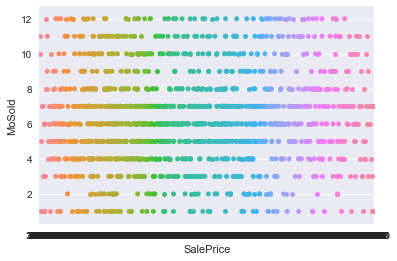

In [36]:
import seaborn as sns
sns.set(color_codes=True)
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline
sns.stripplot(x="SalePrice", y="MoSold", data=ds, jitter=True)

In [19]:
# Create and deploy interactive data applications

from IPython.display import IFrame
IFrame('https://demo.bokehplots.com/apps/sliders', width=900, height=500)